<a href="https://colab.research.google.com/github/abhicse002/Py_DS_libs/blob/main/case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# from google.colab import files
# uploaded = files.upload()
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [158]:
df = pd.read_csv("/content/data_regression.csv")
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [78]:
df.shape

(2000, 16)

In [23]:
df.columns


Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [15]:
len(df.columns)

16

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

# Statistical description of the Columns

In [27]:
# data is for year 2015
df['age'].quantile(0.25)
df['age'].quantile(0.75)
df['age'].quantile(0.50)

37.0

In [29]:
df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [32]:
df['gender'].mode()

,gender
0,Male


In [35]:
df['multi_screen'].unique()

array(['no', 'yes'], dtype=object)

In [38]:
df['multi_screen'].value_counts()

,count
multi_screen,
no,1802
yes,198


In [45]:
  df['multi_screen'].mode()

,multi_screen
0,no


In [46]:
df['churn']

,churn
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
1995,NaN
1996,0.0
1997,0.0
1998,0.0


In [66]:
# assign certain user defined values to categorical numberical values
df['churn'] = df['churn'].map({0.0: 'subs', 1.0: 'unsubs'})
df['churn']

,churn
0,subs
1,subs
2,unsubs
3,subs
4,subs
...,...
1995,NaN
1996,subs
1997,subs
1998,subs


In [80]:
df.drop(['year'], axis=1, inplace=True)

In [81]:
df

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


# How to pick the Categorical Columns

In [83]:
# unique value analysis
# to check if column is categorical
# Categorical -- gender, age, multi_screen, mail_subscribed, churn
df.nunique()

,0
customer_id,1999
phone_no,2000
gender,2
age,63
no_of_days_subscribed,204
multi_screen,2
mail_subscribed,2
weekly_mins_watched,1260
minimum_daily_mins,149
maximum_daily_mins,1260


# How to get percentage  proportion of data points

In [84]:
df['gender'].value_counts(dropna=False) / df['gender'].value_counts(dropna=False).sum() * 100

,count
gender,
Male,52.65
Female,46.15
NaN,1.20


In [86]:
# Normalize = keeps in range between 0 to 1
df['gender'].value_counts(dropna=False, normalize=True) * 100

,proportion
gender,
Male,52.65
Female,46.15
NaN,1.20


<Axes: xlabel='gender', ylabel='count'>

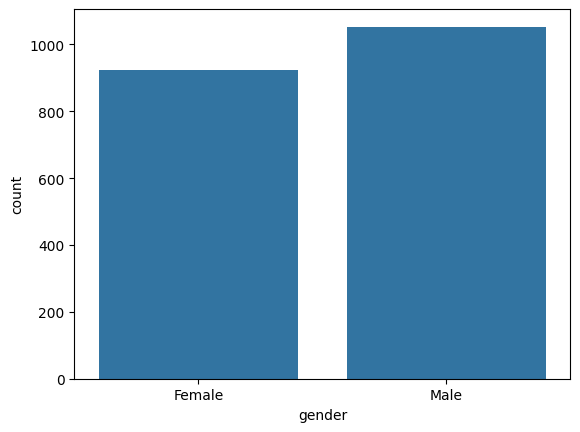

In [98]:
# sns.countplot(x='gender', data=df, labels=['Gender', 'Count'])
sns.countplot(x='gender', data=df)

([<matplotlib.patches.Wedge at 0x7d31ccef0580>,
 [Text(-0.08252640126929495, 0.7957319857172636, 'Male'),
  Text(0.08252640126929502, -0.7957319857172636, 'Female')],
 [Text(-0.061894800951971196, 0.5967989892879476, '53%'),
  Text(0.06189480095197126, -0.5967989892879476, '47%')])

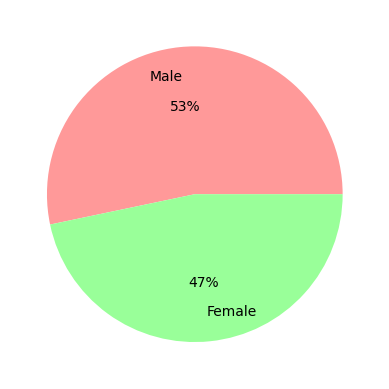

In [142]:
# autopct = adjusting the placement of Percentage Data
# labeldistance = adjusting the placement of Label
# colors
custom_colors = ['#ff9999', '#99ff99']
colors=custom_colors
plt.pie(df['gender'].value_counts(),labels=['Male', 'Female'], colors=colors, autopct='%0.0f%%', labeldistance=0.8
, startangle=0)


# how to find missing values count

In [159]:
# Missing values
df.isna().sum()[df.isna().sum() > 0]

,0
gender,24
maximum_days_inactive,28
churn,35


# How to handle missing values

1.   how to fill categorical missing columns
2.   MODE, most frequently appeared
3. a new category as well


# How to delete a column


1.   If the column has more than 30 - 40 % data missing, then we should be deleting it.
2. Can be kept only if that data us very much important, by filling it with some data.



# How to delete a Row
1. When most columns are null, but usally not followed, since row data is very miuch important.
2. Value lower then lower limit will be replaced by lower Limit
3. Values higher than the upper limit will be replaced by the Upper Limit.

In [171]:
# df['gender'].mode() # since this gives series, we need fetch details from Series
# df['maximum_days_inactive'].median(). # gives numpy.float64, not series, so no need for iloc

# df['gender'].mode().iloc[0]

type(df['maximum_days_inactive'].mode().iloc[0])

numpy.float64

In [172]:
df.fillna({'gender': df['gender'].mode().iloc[0],
           'maximum_days_inactive': df['maximum_days_inactive'].median(),
           'churn': df['churn'].mode().iloc[0]}, inplace=True)

In [173]:
df.isna().sum()

,0
year,0
customer_id,0
phone_no,0
gender,0
age,0
no_of_days_subscribed,0
multi_screen,0
mail_subscribed,0
weekly_mins_watched,0
minimum_daily_mins,0


# How IQR Method works
1. Sprt the Column data
2. find Q1, Q3
3. IQR = Calculate Q3 - Q1
4. Lower Limit = Q1 - 1.5 * IQR
5. Upper Limit = Q3 + 1.5 * IQR
6. 1.5 is industry std after some reasearch, but can be changed even in sns plots, using whis


In [175]:
df.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [187]:
q1 = df['weekly_mins_watched'].quantile(0.25)
q3 = df['weekly_mins_watched'].quantile(0.75)
IQR = q3 - q1
lower_limit  = q1 - 1.5 * IQR
upper_limit  = q3 + 1.5 * IQR

In [188]:
print(lower_limit)
print(q1)
print(q3)
print(upper_limit)

58.51874999999998
218.2125
324.675
484.36875000000003


# How to remove outliers data

In [193]:
# Clip() from Pandas
df['maximum_days_inactive'] = df['maximum_days_inactive'].clip(lower=lower_limit, upper=upper_limit)


,maximum_days_inactive
0,None
1,None
2,None
3,None
4,None
...,...
1995,None
1996,None
1997,None
1998,None


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


ValueError: List of boxplot statistics and `positions` values must have same the length

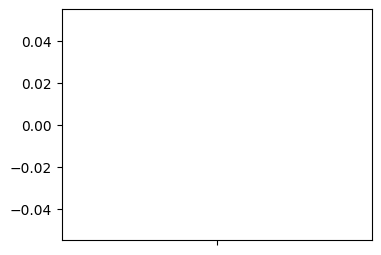

In [198]:
plt.figure(figsize=(4, 3))
sns.boxplot(y='maximum_days_inactive', data=df)
plt.show()

How get_dummies works

In [205]:
# pd.get_dummies()
# To convert categorical columns into numerical columns.
df1 = pd.get_dummies(df['gender'], dtype='int')
df1

# now to concatenate with the original DF, use the concat
df11 = pd.concat([df, df1])
df11


,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male
0,2015.0,100198.0,409-8743,Female,36.0,62.0,no,no,148.35,12.2,16.81,82.0,1.0,None,1.0,0.0,NaN,NaN
1,2015.0,100643.0,340-5930,Female,39.0,149.0,no,no,294.45,7.7,33.37,87.0,3.0,None,2.0,0.0,NaN,NaN
2,2015.0,100756.0,372-3750,Female,65.0,126.0,no,no,87.30,11.9,9.89,91.0,1.0,None,5.0,1.0,NaN,NaN
3,2015.0,101595.0,331-4902,Female,24.0,131.0,no,yes,321.30,9.5,36.41,102.0,4.0,None,3.0,0.0,NaN,NaN
4,2015.0,101653.0,351-8398,Female,40.0,191.0,no,no,243.00,10.9,27.54,83.0,7.0,None,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
